# Data Cleansing and Preparation:
## The following data cleansing and preparation steps were followed by the work in the source below:
### https://www.kaggle.com/code/okanulu/android-malware-prediction-with-ml-algorithms
## The neural-network model implementation, analysis, and evaluation are unique to this notebook with.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [4]:
data = pd.read_csv("../../../data/Android_Malware.csv")
print(data)
data = data.drop(' Timestamp', axis=1)

C:\Users\grace\AppData\Local\Temp\ipykernel_4888\4204408830.py:1: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../../data/Android_Malware.csv")


        Unnamed: 0                                  Flow ID     Source IP  \
0                0    172.217.6.202-10.42.0.211-443-50004-6   10.42.0.211   
1                1    172.217.6.202-10.42.0.211-443-35455-6   10.42.0.211   
2                2    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
3                3    131.253.61.68-10.42.0.211-443-51775-6   10.42.0.211   
4                4    131.253.61.68-10.42.0.211-443-51776-6   10.42.0.211   
...            ...                                      ...           ...   
355625         405      172.217.7.14-10.42.0.211-80-38405-6  172.217.7.14   
355626         406         10.42.0.211-10.42.0.1-7632-53-17   10.42.0.211   
355627         407  10.42.0.211-104.192.110.245-45970-443-6   10.42.0.211   
355628         408        10.42.0.211-10.42.0.1-51982-53-17   10.42.0.211   
355629         409         10.42.0.211-10.42.0.1-9320-53-17   10.42.0.211   

         Source Port   Destination IP   Destination Port   Protocol  \
0   

In [5]:
print(data.columns.tolist())

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [6]:
print(data['Label'].value_counts())
names=sorted(data['Label'].unique().tolist())
print(names)

Label
Android_Adware         147443
Android_Scareware      117082
Android_SMS_Malware     67397
Benign                  23708
Name: count, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


In [7]:
print(data.dtypes)

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Label               object
Length: 85, dtype: object


In [8]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,37027,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,36653,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,534099,8,12,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,9309,3,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,19890496,8,6,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [9]:
print("Total Features : ",len(data.columns)-1)

Total Features :  84


# Data Preprocessing done unique to this notebook:

- Filtering the Dataset: The dataset is filtered to include only two labels—'Benign' and 'Android_SMS_Malware'—by dropping irrelevant categories ('Android_Adware' and 'Android_Scareware'). This ensures the model focuses on the most relevant classification task.

- Dropping Non-Numeric Columns: Non-numeric columns, such as 'Flow ID', 'Source IP', 'Destination IP', and others, are removed from the feature set. This is critical because machine learning models, including Random Forests, require numerical input data for training.

- Ensuring Numeric Data: After dropping non-numeric columns, the feature matrix (X) is checked to ensure only numeric columns remain. This step ensures that there are no data type issues when passing the data to the model.

- Label Encoding: The target variable (y) is mapped to integers—0 for 'Benign' and 1 for 'Android_SMS_Malware'. This allows the model to interpret the categorical labels as numeric values for classification.

## Step 1: Filter the dataset to include only 'Android_SMS_Malware' and 'Benign'

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.impute import SimpleImputer

filtered_data = data[data["Label"].isin(['Android_SMS_Malware', 'Benign'])]

In [11]:
filtered_data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
264525,0,10.42.0.151-40.69.219.199-35131-443-6,10.42.0.151,35131,40.69.219.199,443.0,6.0,12109,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264526,1,10.42.0.151-40.69.219.199-35131-443-6,40.69.219.199,443,10.42.0.151,35131.0,6.0,43,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264527,2,10.42.0.151-40.122.44.96-54930-443-6,10.42.0.151,54930,40.122.44.96,443.0,6.0,14678,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264528,3,10.42.0.151-40.122.44.96-54930-443-6,40.122.44.96,443,10.42.0.151,54930.0,6.0,43,2,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
264529,4,10.42.0.151-52.179.153.195-53215-443-6,10.42.0.151,53215,52.179.153.195,443.0,6.0,3355709,11,7,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,126711,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,48012,1,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,20028018,11,8,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,347926,1,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Step 2: Drop non-numeric columns

In [12]:
X_filtered = filtered_data.drop(['Flow ID', ' Source IP', ' Destination IP', ' CWE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Label'], axis=1)

## Step 3: Ensure only numeric data remains

In [13]:
X_filtered_numeric = X_filtered.select_dtypes(include=[np.number])

## Verify that only numeric columns remain

In [14]:
print(X_filtered_numeric.dtypes)

Unnamed: 0             int64
 Source Port           int64
 Destination Port    float64
 Protocol            float64
 Flow Duration         int64
                      ...   
 Active Min          float64
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
Length: 78, dtype: object


## Step 4: Separate features (X) and target (y) after filtering

In [15]:
X = X_filtered_numeric
y = filtered_data["Label"]

## Step 5: Convert the target labels into numerical categories (Benign = 0, Android_SMS_Malware = 1)

In [16]:
y = y.map({'Benign': 0, 'Android_SMS_Malware': 1})

## Step 6: Check the data types of y to ensure it's numeric

In [17]:
print(y.dtypes)  # It should print "int64" or similar to indicate discrete values

int64


# Data Balancing: 
- Balancing Classes: Since class imbalance can negatively impact model performance, the balance_data function resamples the data to ensure both classes ('Benign' and 'Android_SMS_Malware') are equally represented. This step involves resampling the minority class (whichever has fewer samples) so that both classes have the same number of data points. After balancing, the data is shuffled to randomize the sample order.

- Ensuring Numeric Labels: The balanced target variable (y_balanced) is explicitly converted to integers. This step ensures that the model correctly interprets the labels as discrete classes during training and evaluation.

## Step 7: Balance the dataset using the balance_data function

In [35]:

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import pandas as pd

def balance_and_scale_data(X, y, random_state=0, total_samples=45000):
    # Combine X and y into one DataFrame
    data = pd.concat([X, y], axis=1)
    
    # Count the occurrences of each class
    class_counts = y.value_counts()
    minority_class_count = class_counts.min()

    
    # Balance data by resampling each class to the size of the minority class
    balanced_data = pd.DataFrame(columns=data.columns)
    for label in class_counts.index:
        class_samples = data[data["Label"] == label]
        resampled_samples = resample(class_samples,
                                     replace=True,
                                     n_samples=minority_class_count,
                                     random_state=random_state)
        balanced_data = pd.concat([balanced_data, resampled_samples])
    
    # Shuffle the balanced dataset
    balanced_data = balanced_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Now, limit the balanced dataset to a total of 20k samples
    final_data = balanced_data.sample(n=total_samples, random_state=random_state).reset_index(drop=True)
    print(final_data)
    # Separate features and labels
    X_balanced = final_data.drop("Label", axis=1)
    y_balanced = final_data["Label"]
    
    # Check for NaN values before imputation
    print("Number of NaN values in each column before imputation:")
    print(X_balanced.isna().sum())
    
    # Impute missing values using the mean strategy
    imputer = SimpleImputer(strategy='mean')
    X_balanced_imputed = imputer.fit_transform(X_balanced)
    
    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_balanced_imputed)
    
    return X_scaled, y_balanced

## Step 8: Balance the data

In [36]:
X_balanced, y_balanced = balance_and_scale_data(X, y)

C:\Users\grace\AppData\Local\Temp\ipykernel_4888\1790431931.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  balanced_data = pd.concat([balanced_data, resampled_samples])


      Unnamed: 0  Source Port   Destination Port   Protocol  Flow Duration  \
0            781        51045            12350.0        6.0       28839333   
1            508        42486              443.0        6.0         278182   
2           1061        12890               53.0       17.0          22500   
3           1611        20829               53.0       17.0          32066   
4           2703        34598              443.0       17.0         169698   
...          ...          ...                ...        ...            ...   
44995       3707        36798              443.0        6.0         531442   
44996       1165          443            46476.0        6.0             58   
44997        616        37671               53.0       17.0          48832   
44998       1016        57261              443.0        6.0            806   
44999       1354        41497              443.0        6.0         427231   

       Total Fwd Packets  Total Backward Packets  Total Length 

## Step 9: Ensure y_balanced is correctly mapped to integers

In [37]:
y_balanced = y_balanced.astype(int)
print(y_balanced.dtypes)  

int32


## Step 10: Check for and remove missing values
- Checks for NaN (missing) values in each column of the original dataset (X_balanced) before handling missing values.
- Uses the SimpleImputer to impute (fill in) missing values in the dataset by replacing NaNs with the mean value of the respective column.
- Converts the imputed data (initially a NumPy array) back into a DataFrame to maintain compatibility with the rest of the code.
- Verifies that all NaN values have been successfully imputed by checking for any remaining NaNs in the cleaned dataset (X_balanced_clean).
- Ensures that the target variable (y_balanced) remains aligned with the cleaned feature dataset (X_balanced_clean).

In [38]:
X_balanced

array([[-0.08575199,  0.65299307,  0.45489437, ..., -0.11940891,
        -0.30033819, -0.28267687],
       [-0.39025827,  0.18517724, -0.34364348, ..., -0.11940891,
        -0.30033819, -0.28267687],
       [ 0.22656214, -1.43247405, -0.36979866, ..., -0.11940891,
        -0.30033819, -0.28267687],
       ...,
       [-0.26979425, -0.07799991, -0.36979866, ..., -0.11940891,
        -0.30033819, -0.28267687],
       [ 0.1763688 ,  0.99274576, -0.34364348, ..., -0.11940891,
        -0.30033819, -0.28267687],
       [ 0.55337657,  0.13112071, -0.34364348, ..., -0.11940891,
        -0.30033819, -0.28267687]])

In [39]:
y_balanced

0        1
1        0
2        1
3        0
4        1
        ..
44995    1
44996    1
44997    0
44998    1
44999    1
Name: Label, Length: 45000, dtype: int32

In [43]:
#CONCEPt KFOLDS
# Number of folds
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
all_fold_accuracies = []

Training fold 1...
Epoch 1/10
1125/1125 [==============================] - 4s 2ms/step - loss: 0.5406 - accuracy: 0.7264 - val_loss: 0.4746 - val_accuracy: 0.7567
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4671 - accuracy: 0.7642 - val_loss: 0.4643 - val_accuracy: 0.7629
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4577 - accuracy: 0.7699 - val_loss: 0.4565 - val_accuracy: 0.7640
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4532 - accuracy: 0.7726 - val_loss: 0.4542 - val_accuracy: 0.7671
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4482 - accuracy: 0.7760 - val_loss: 0.4503 - val_accuracy: 0.7664
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4457 - accuracy: 0.7784 - val_loss: 0.4501 - val_accuracy: 0.7689
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4439 - accuracy: 0.7793 - val_loss: 0.4

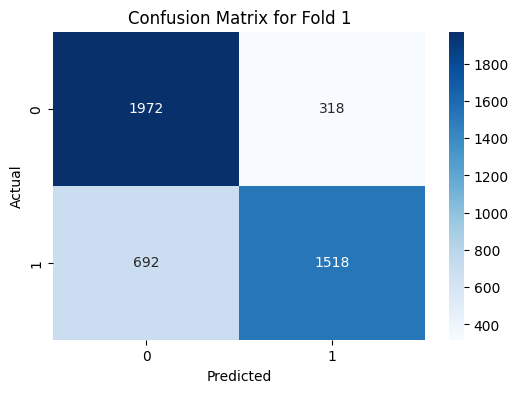

Training fold 2...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5403 - accuracy: 0.7172 - val_loss: 0.4858 - val_accuracy: 0.7502
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4687 - accuracy: 0.7655 - val_loss: 0.4684 - val_accuracy: 0.7642
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4569 - accuracy: 0.7727 - val_loss: 0.4599 - val_accuracy: 0.7718
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.7735 - val_loss: 0.4552 - val_accuracy: 0.7718
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.7763 - val_loss: 0.4543 - val_accuracy: 0.7696
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4470 - accuracy: 0.7784 - val_loss: 0.4513 - val_accuracy: 0.7784
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4440 - accuracy: 0.7815 - val_loss: 0.4

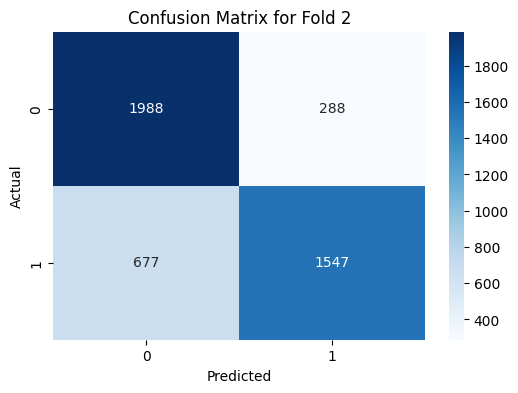

Training fold 3...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5531 - accuracy: 0.6994 - val_loss: 0.4721 - val_accuracy: 0.7684
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4627 - accuracy: 0.7649 - val_loss: 0.4608 - val_accuracy: 0.7682
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4554 - accuracy: 0.7708 - val_loss: 0.4584 - val_accuracy: 0.7713
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4515 - accuracy: 0.7705 - val_loss: 0.4571 - val_accuracy: 0.7727
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4477 - accuracy: 0.7736 - val_loss: 0.4553 - val_accuracy: 0.7802
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4450 - accuracy: 0.7763 - val_loss: 0.4524 - val_accuracy: 0.7778
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4428 - accuracy: 0.7790 - val_loss: 0.4

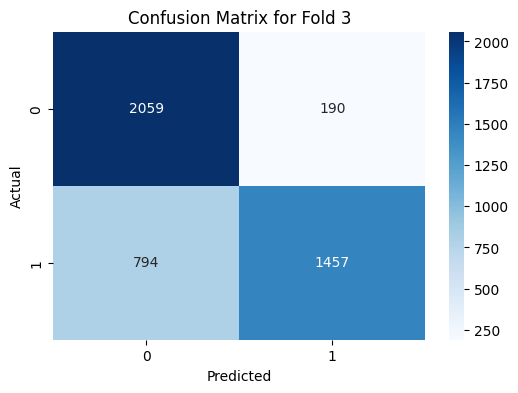

Training fold 4...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5327 - accuracy: 0.7299 - val_loss: 0.4771 - val_accuracy: 0.7636
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4606 - accuracy: 0.7670 - val_loss: 0.4639 - val_accuracy: 0.7651
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4535 - accuracy: 0.7725 - val_loss: 0.4591 - val_accuracy: 0.7698
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4499 - accuracy: 0.7740 - val_loss: 0.4578 - val_accuracy: 0.7716
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4474 - accuracy: 0.7766 - val_loss: 0.4541 - val_accuracy: 0.7727
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.7765 - val_loss: 0.4553 - val_accuracy: 0.7736
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4431 - accuracy: 0.7779 - val_loss: 0.4

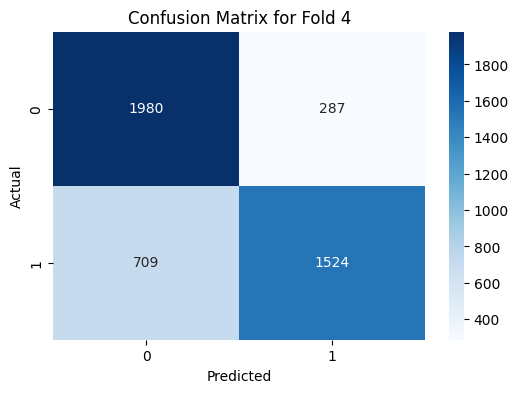

Training fold 5...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5200 - accuracy: 0.7302 - val_loss: 0.4751 - val_accuracy: 0.7587
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4660 - accuracy: 0.7620 - val_loss: 0.4606 - val_accuracy: 0.7660
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4581 - accuracy: 0.7673 - val_loss: 0.4574 - val_accuracy: 0.7676
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4540 - accuracy: 0.7706 - val_loss: 0.4509 - val_accuracy: 0.7709
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4496 - accuracy: 0.7740 - val_loss: 0.4471 - val_accuracy: 0.7773
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4466 - accuracy: 0.7761 - val_loss: 0.4480 - val_accuracy: 0.7718
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4439 - accuracy: 0.7776 - val_loss: 0.4

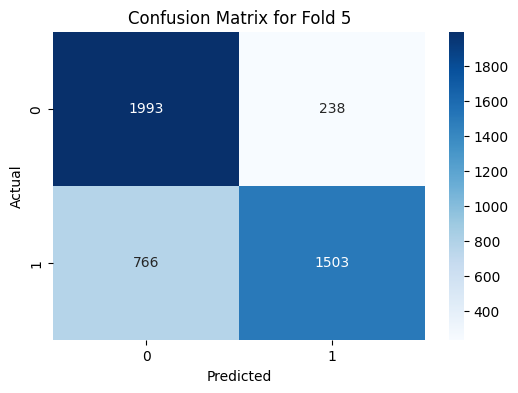

Training fold 6...
Epoch 1/10
1125/1125 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.7157 - val_loss: 0.4735 - val_accuracy: 0.7529
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4664 - accuracy: 0.7672 - val_loss: 0.4623 - val_accuracy: 0.7629
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4556 - accuracy: 0.7709 - val_loss: 0.4549 - val_accuracy: 0.7691
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4504 - accuracy: 0.7723 - val_loss: 0.4504 - val_accuracy: 0.7753
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4459 - accuracy: 0.7783 - val_loss: 0.4539 - val_accuracy: 0.7669
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4439 - accuracy: 0.7775 - val_loss: 0.4509 - val_accuracy: 0.7702
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4408 - accuracy: 0.7795 - val_loss: 0.4

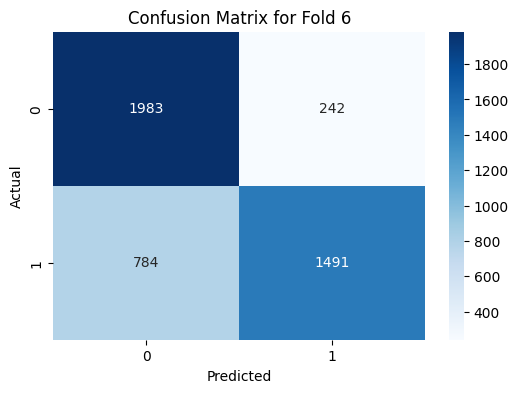

Training fold 7...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5442 - accuracy: 0.7024 - val_loss: 0.4793 - val_accuracy: 0.7498
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4608 - accuracy: 0.7677 - val_loss: 0.4664 - val_accuracy: 0.7551
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4527 - accuracy: 0.7716 - val_loss: 0.4565 - val_accuracy: 0.7649
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4487 - accuracy: 0.7743 - val_loss: 0.4570 - val_accuracy: 0.7653
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4452 - accuracy: 0.7763 - val_loss: 0.4528 - val_accuracy: 0.7664
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4422 - accuracy: 0.7776 - val_loss: 0.4521 - val_accuracy: 0.7693
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.7791 - val_loss: 0.4

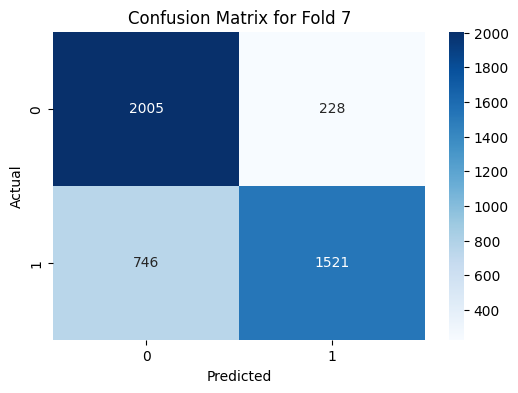

Training fold 8...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5308 - accuracy: 0.7223 - val_loss: 0.4747 - val_accuracy: 0.7547
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4620 - accuracy: 0.7662 - val_loss: 0.4684 - val_accuracy: 0.7573
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4531 - accuracy: 0.7734 - val_loss: 0.4634 - val_accuracy: 0.7644
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4487 - accuracy: 0.7766 - val_loss: 0.4626 - val_accuracy: 0.7678
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4457 - accuracy: 0.7770 - val_loss: 0.4578 - val_accuracy: 0.7727
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4438 - accuracy: 0.7785 - val_loss: 0.4566 - val_accuracy: 0.7738
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4416 - accuracy: 0.7821 - val_loss: 0.4

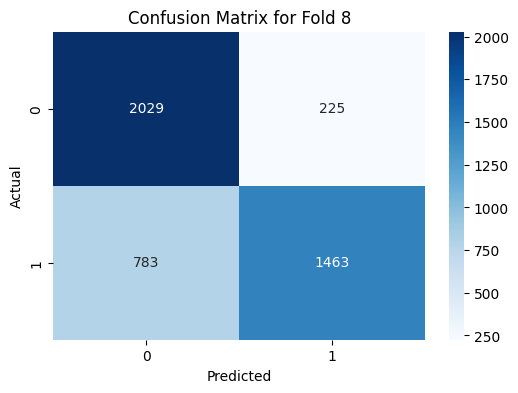

Training fold 9...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5285 - accuracy: 0.7243 - val_loss: 0.4650 - val_accuracy: 0.7713
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4638 - accuracy: 0.7671 - val_loss: 0.4511 - val_accuracy: 0.7720
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.7695 - val_loss: 0.4428 - val_accuracy: 0.7796
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4529 - accuracy: 0.7735 - val_loss: 0.4397 - val_accuracy: 0.7793
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4501 - accuracy: 0.7752 - val_loss: 0.4402 - val_accuracy: 0.7787
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4484 - accuracy: 0.7775 - val_loss: 0.4341 - val_accuracy: 0.7820
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4457 - accuracy: 0.7787 - val_loss: 0.4

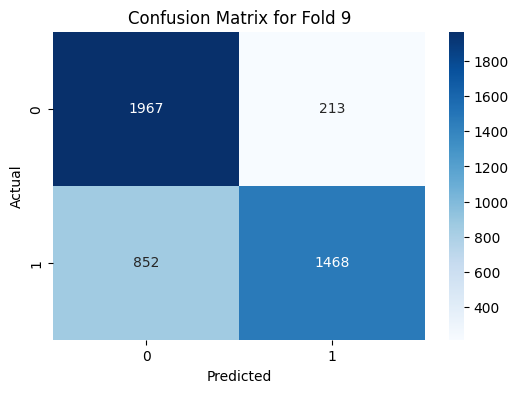

Training fold 10...
Epoch 1/10
1125/1125 [==============================] - 4s 2ms/step - loss: 0.5495 - accuracy: 0.7112 - val_loss: 0.4961 - val_accuracy: 0.7451
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4729 - accuracy: 0.7619 - val_loss: 0.4721 - val_accuracy: 0.7587
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4603 - accuracy: 0.7679 - val_loss: 0.4600 - val_accuracy: 0.7682
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4542 - accuracy: 0.7713 - val_loss: 0.4602 - val_accuracy: 0.7687
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4516 - accuracy: 0.7741 - val_loss: 0.4556 - val_accuracy: 0.7716
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4494 - accuracy: 0.7756 - val_loss: 0.4535 - val_accuracy: 0.7740
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4466 - accuracy: 0.7762 - val_loss: 0.

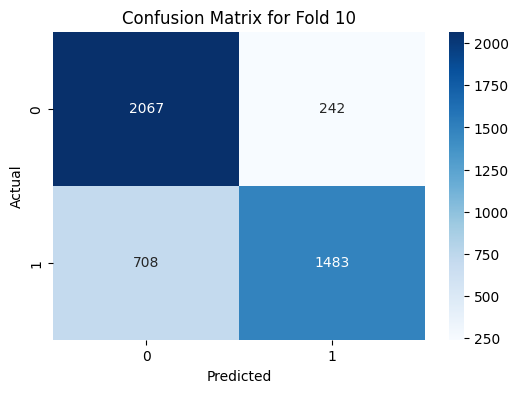

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

for train_index, test_index in kf.split(X_balanced):
    print(f"Training fold {fold_no}...")

    # Use regular array slicing for NumPy arrays
    X_train, X_test = X_balanced[train_index], X_balanced[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
    
    # Further split X_train and y_train into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

    # Ensure data is converted to float32 for TensorFlow
    X_train, X_val, X_test = X_train.astype(np.float32), X_val.astype(np.float32), X_test.astype(np.float32)
    y_train, y_val, y_test = y_train.astype(np.float32), y_val.astype(np.float32), y_test.astype(np.float32)

    # Build a new model for each fold
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to avoid overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    # Train the model
    ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluate the model on the test data
    y_pred_prob = ann.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold_no} Accuracy: {accuracy}")
    all_fold_accuracies.append(accuracy)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix (optional)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

# Model Variation:
In this variation, the hidden layers of the neural network use the **ReLU (Rectified Linear Unit)** activation function instead of `sigmoid`. 
- **ReLU** allows faster convergence and prevents issues such as vanishing gradients.
- The **output layer** retains the `sigmoid` activation function, which is appropriate for **binary classification** tasks (outputting probabilities between 0 and 1).
This modification can improve training speed and model performance on complex datasets.

Training fold 1...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5317 - accuracy: 0.7255 - val_loss: 0.4873 - val_accuracy: 0.7529
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4607 - accuracy: 0.7689 - val_loss: 0.4705 - val_accuracy: 0.7636
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4532 - accuracy: 0.7718 - val_loss: 0.4695 - val_accuracy: 0.7627
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4496 - accuracy: 0.7741 - val_loss: 0.4643 - val_accuracy: 0.7613
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.7758 - val_loss: 0.4652 - val_accuracy: 0.7660
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4441 - accuracy: 0.7777 - val_loss: 0.4655 - val_accuracy: 0.7671
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4419 - accuracy: 0.7788 - val_loss: 0.4

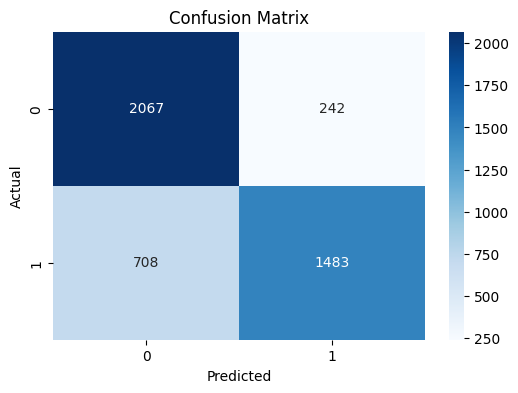

Training fold 2...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5390 - accuracy: 0.7176 - val_loss: 0.4861 - val_accuracy: 0.7562
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4636 - accuracy: 0.7669 - val_loss: 0.4764 - val_accuracy: 0.7633
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4543 - accuracy: 0.7716 - val_loss: 0.4708 - val_accuracy: 0.7611
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.7724 - val_loss: 0.4702 - val_accuracy: 0.7620
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4482 - accuracy: 0.7746 - val_loss: 0.4633 - val_accuracy: 0.7671
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4458 - accuracy: 0.7772 - val_loss: 0.4622 - val_accuracy: 0.7656
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4433 - accuracy: 0.7793 - val_loss: 0.4

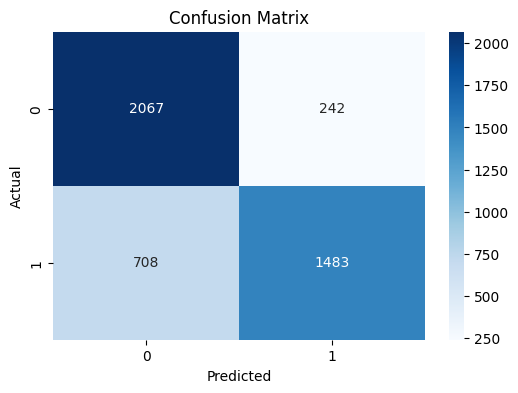

Training fold 3...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5400 - accuracy: 0.7147 - val_loss: 0.4885 - val_accuracy: 0.7536
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4657 - accuracy: 0.7651 - val_loss: 0.4744 - val_accuracy: 0.7591
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4560 - accuracy: 0.7683 - val_loss: 0.4680 - val_accuracy: 0.7638
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4493 - accuracy: 0.7747 - val_loss: 0.4650 - val_accuracy: 0.7678
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.7776 - val_loss: 0.4654 - val_accuracy: 0.7638
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4434 - accuracy: 0.7801 - val_loss: 0.4596 - val_accuracy: 0.7667
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4412 - accuracy: 0.7819 - val_loss: 0.4

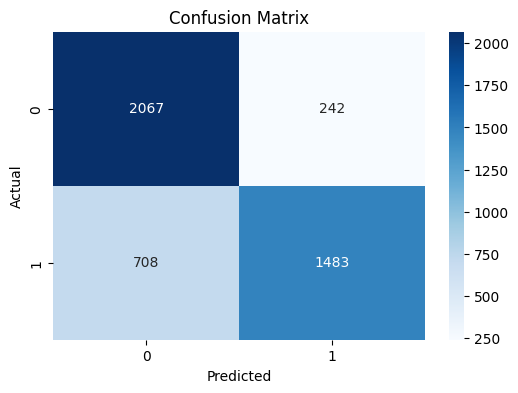

Training fold 4...
Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5507 - accuracy: 0.7085 - val_loss: 0.4864 - val_accuracy: 0.7613
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4635 - accuracy: 0.7652 - val_loss: 0.4709 - val_accuracy: 0.7604
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4529 - accuracy: 0.7733 - val_loss: 0.4678 - val_accuracy: 0.7642
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4485 - accuracy: 0.7747 - val_loss: 0.4682 - val_accuracy: 0.7671
Epoch 5/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4447 - accuracy: 0.7783 - val_loss: 0.4576 - val_accuracy: 0.7707
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4415 - accuracy: 0.7802 - val_loss: 0.4584 - val_accuracy: 0.7729
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4391 - accuracy: 0.7826 - val_loss: 0.4

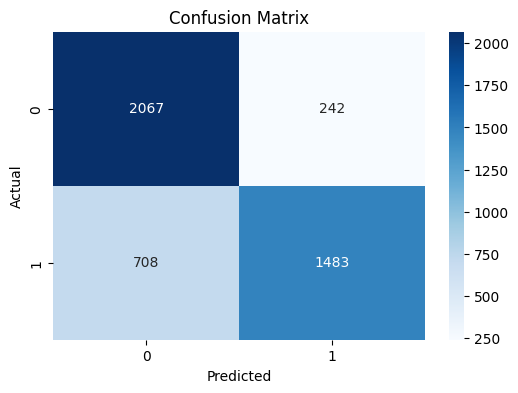

Training fold 5...
Epoch 1/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5250 - accuracy: 0.7253 - val_loss: 0.4812 - val_accuracy: 0.7598
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4583 - accuracy: 0.7697 - val_loss: 0.4710 - val_accuracy: 0.7653
Epoch 3/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4507 - accuracy: 0.7732 - val_loss: 0.4659 - val_accuracy: 0.7662
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4475 - accuracy: 0.7758 - val_loss: 0.4596 - val_accuracy: 0.7696
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4436 - accuracy: 0.7779 - val_loss: 0.4561 - val_accuracy: 0.7709
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4416 - accuracy: 0.7791 - val_loss: 0.4553 - val_accuracy: 0.7793
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4387 - accuracy: 0.7794 - val_loss: 0.4

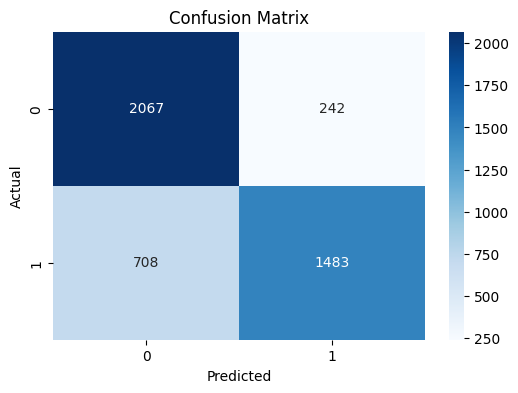

Training fold 6...
Epoch 1/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.5223 - accuracy: 0.7314 - val_loss: 0.4798 - val_accuracy: 0.7558
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4587 - accuracy: 0.7686 - val_loss: 0.4651 - val_accuracy: 0.7660
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.7749 - val_loss: 0.4603 - val_accuracy: 0.7713
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.7788 - val_loss: 0.4571 - val_accuracy: 0.7747
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4439 - accuracy: 0.7780 - val_loss: 0.4547 - val_accuracy: 0.7729
Epoch 6/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4420 - accuracy: 0.7810 - val_loss: 0.4554 - val_accuracy: 0.7753
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4392 - accuracy: 0.7818 - val_loss: 0.4

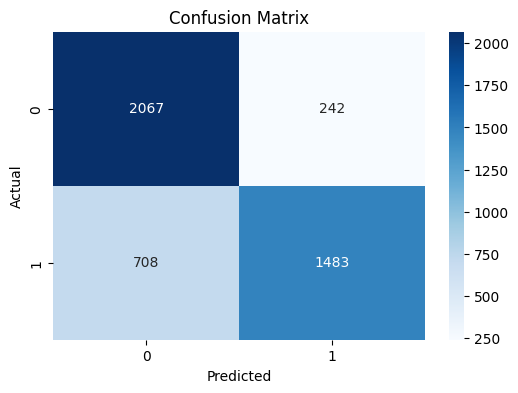

Training fold 7...
Epoch 1/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.5289 - accuracy: 0.7261 - val_loss: 0.4891 - val_accuracy: 0.7558
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4595 - accuracy: 0.7695 - val_loss: 0.4739 - val_accuracy: 0.7658
Epoch 3/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4509 - accuracy: 0.7747 - val_loss: 0.4671 - val_accuracy: 0.7687
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4458 - accuracy: 0.7779 - val_loss: 0.4635 - val_accuracy: 0.7676
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4425 - accuracy: 0.7806 - val_loss: 0.4593 - val_accuracy: 0.7760
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4406 - accuracy: 0.7810 - val_loss: 0.4589 - val_accuracy: 0.7749
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.7826 - val_loss: 0.4

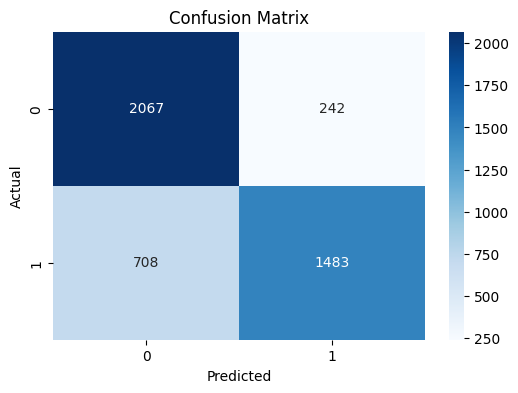

Training fold 8...
Epoch 1/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.5394 - accuracy: 0.7191 - val_loss: 0.4869 - val_accuracy: 0.7493
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4608 - accuracy: 0.7689 - val_loss: 0.4696 - val_accuracy: 0.7607
Epoch 3/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4536 - accuracy: 0.7735 - val_loss: 0.4716 - val_accuracy: 0.7638
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4509 - accuracy: 0.7750 - val_loss: 0.4618 - val_accuracy: 0.7696
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4473 - accuracy: 0.7778 - val_loss: 0.4609 - val_accuracy: 0.7691
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4446 - accuracy: 0.7781 - val_loss: 0.4607 - val_accuracy: 0.7722
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4431 - accuracy: 0.7798 - val_loss: 0.4

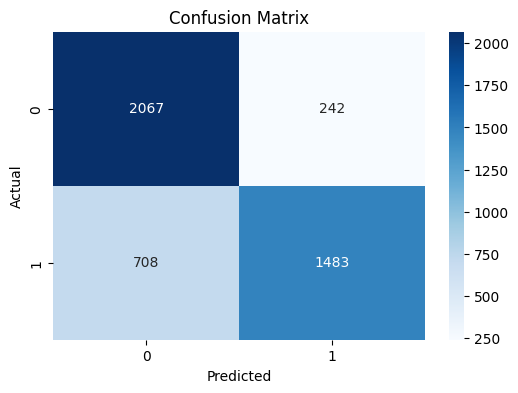

Training fold 9...
Epoch 1/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.5263 - accuracy: 0.7312 - val_loss: 0.4736 - val_accuracy: 0.7564
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4593 - accuracy: 0.7694 - val_loss: 0.4674 - val_accuracy: 0.7638
Epoch 3/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4522 - accuracy: 0.7736 - val_loss: 0.4624 - val_accuracy: 0.7707
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4473 - accuracy: 0.7761 - val_loss: 0.4589 - val_accuracy: 0.7736
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4445 - accuracy: 0.7802 - val_loss: 0.4588 - val_accuracy: 0.7709
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.7797 - val_loss: 0.4534 - val_accuracy: 0.7751
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4407 - accuracy: 0.7825 - val_loss: 0.4

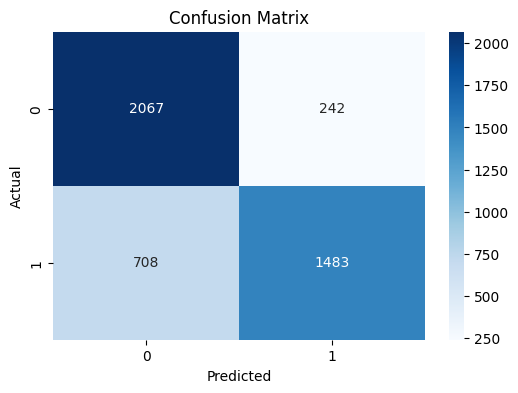

Training fold 10...
Epoch 1/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.5258 - accuracy: 0.7256 - val_loss: 0.4822 - val_accuracy: 0.7533
Epoch 2/10
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4597 - accuracy: 0.7679 - val_loss: 0.4717 - val_accuracy: 0.7658
Epoch 3/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4515 - accuracy: 0.7729 - val_loss: 0.4679 - val_accuracy: 0.7660
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4463 - accuracy: 0.7769 - val_loss: 0.4613 - val_accuracy: 0.7724
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4434 - accuracy: 0.7780 - val_loss: 0.4581 - val_accuracy: 0.7749
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.7806 - val_loss: 0.4569 - val_accuracy: 0.7760
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4384 - accuracy: 0.7825 - val_loss: 0.

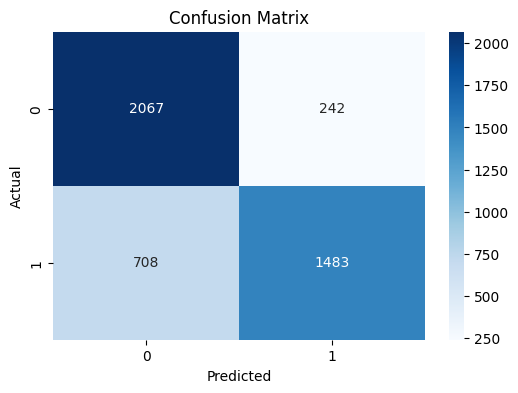

Average Accuracy after 10 folds: 0.7774666666666665


In [47]:
fold_no = 1
for train_index, test_index in kf.split(X):
    print(f"Training fold {fold_no}...")

    # Splitting data into training and test sets for this fold

    # Initial split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.1, random_state=42)
    # Further split X_train and y_train into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

    # Build a new model for each fold with ReLU activation in hidden layers
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=10, activation='relu'))  # ReLU activation for hidden layer 1
    ann.add(tf.keras.layers.Dense(units=10, activation='relu'))  # ReLU activation for hidden layer 2
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Sigmoid activation for the output layer (binary classification)

    # Compile the model
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model (use early stopping or define your own number of epochs)    
    ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


    # Evaluate the model on the test data
    y_pred_prob = ann.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold_no} Accuracy: {accuracy}")
    all_fold_accuracies.append(accuracy)

    # Plot confusion matrix (optional but helpful for visualization)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    fold_no += 1

# Average accuracy across all folds
average_accuracy = np.mean(all_fold_accuracies)
print(f"Average Accuracy after {k} folds: {average_accuracy}")